In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set()  

In [2]:
import io
from google.colab import files
plt.style.use("seaborn")
upload = files.upload()

Saving Brent Price1.csv to Brent Price1 (1).csv


In [3]:
df = pd.read_csv("Brent Price1.csv")

In [4]:
df.head()

,DATE,DCOILBRENTEU
0,1987/5/20,18.63
1,1987/5/21,18.45
2,1987/5/22,18.55
3,1987/5/25,18.60
4,1987/5/26,18.63


In [5]:
df.rename(columns={'DATE' : 'date', 'DCOILBRENTEU' : 'price_t'}, inplace=True)

In [6]:
df.head()

,date,price_t
0,1987/5/20,18.63
1,1987/5/21,18.45
2,1987/5/22,18.55
3,1987/5/25,18.60
4,1987/5/26,18.63


In [7]:
# Shift the price_t column by 1 index to obtain price_t-1
df['price_t-1'] = df['price_t'].shift(1)

In [8]:
df.head()

,date,price_t,price_t-1
0,1987/5/20,18.63,NaN
1,1987/5/21,18.45,18.63
2,1987/5/22,18.55,18.45
3,1987/5/25,18.60,18.55
4,1987/5/26,18.63,18.60


In [9]:
import numpy as np
from math import log
df['returns'] = np.log(df['price_t'] / df['price_t-1'])

In [10]:
df.head()

,date,price_t,price_t-1,returns
0,1987/5/20,18.63,NaN,NaN
1,1987/5/21,18.45,18.63,-0.009709
2,1987/5/22,18.55,18.45,0.005405
3,1987/5/25,18.60,18.55,0.002692
4,1987/5/26,18.63,18.60,0.001612


In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import pandas as pd
import io
from google.colab import files

import warnings

warnings.filterwarnings('ignore')

In [13]:
#create new database with only required coloumns
data=df.filter(['returns'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 75 percent
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

6739

In [14]:
df = df.dropna()

In [15]:
df

,date,price_t,price_t-1,returns
1,1987/5/21,18.45,18.63,-0.009709
2,1987/5/22,18.55,18.45,0.005405
3,1987/5/25,18.60,18.55,0.002692
4,1987/5/26,18.63,18.60,0.001612
5,1987/5/27,18.60,18.63,-0.001612
...,...,...,...,...
8980,2022/10/5,94.35,93.74,0.006486
8981,2022/10/6,95.65,94.35,0.013684
8982,2022/10/7,98.88,95.65,0.033211
8983,2022/10/10,97.13,98.88,-0.017857


In [19]:
df.to_csv('Brent return with log return.csv', index=False)

In [2]:
import io
from google.colab import files
plt.style.use("seaborn")
upload = files.upload()

Saving Brent return with log return.csv to Brent return with log return.csv


In [4]:
df = pd.read_csv("Brent return with log return.csv")

In [5]:
df

,date,price_t,price_t-1,returns
0,1987/5/21,18.45,18.63,-0.009709
1,1987/5/22,18.55,18.45,0.005405
2,1987/5/25,18.60,18.55,0.002692
3,1987/5/26,18.63,18.60,0.001612
4,1987/5/27,18.60,18.63,-0.001612
...,...,...,...,...
8979,2022/10/5,94.35,93.74,0.006486
8980,2022/10/6,95.65,94.35,0.013684
8981,2022/10/7,98.88,95.65,0.033211
8982,2022/10/10,97.13,98.88,-0.017857


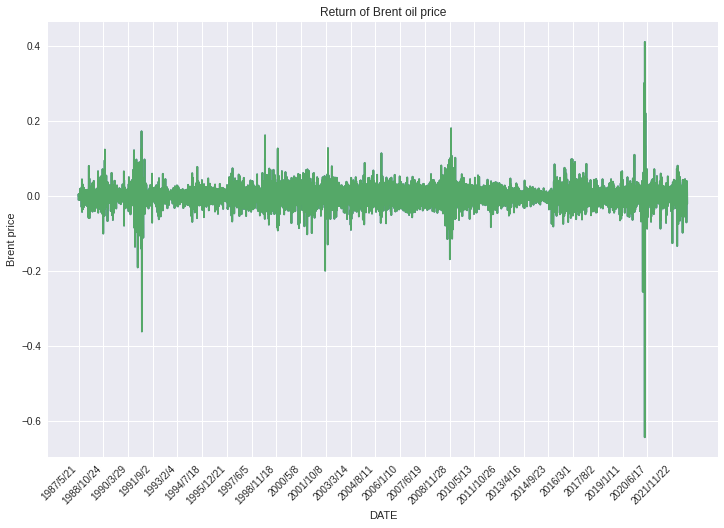

In [6]:
df['returns'].plot(figsize=(12, 8))
plt.title('Return of Brent oil price')
plt.plot(df["returns"])
plt.xticks(df.index[::365], df['date'][::365], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Brent price')
plt.show()

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import pandas as pd
import io
from google.colab import files

import warnings

warnings.filterwarnings('ignore')

In [8]:
#create new database with only required coloumns
data=df.filter(['returns'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 75 percent
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

6738

In [9]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  4.5476633243773105e-18
Standard deviation of processed data:  1.0


In [10]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(5,len(train_data)):
  x_train.append(train_data[i-5:i])
  y_train.append(train_data[i])

In [11]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(6733, 5, 1)

In [12]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
#np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (6733, 5, 1)
x_train shape after reshaping (6733, 5, 1)


In [13]:
#build LSTM model
model= Sequential()
model.add(LSTM(1000,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(1000,return_sequences=False))
model.add(Dense(500))
model.add(Dense(250))
model.add(Dense(1)) 

In [14]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 1000)           4008000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 500)               500500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 12,638,001
Trainable params: 12,638,001
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(len(x_train))
print(x_train.shape)

6733
(6733, 5, 1)


In [17]:
#train the model
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
211/211 [==============================] - 12s 12ms/step - loss: 0.8143
Epoch 2/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8116
Epoch 3/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8094
Epoch 4/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8090
Epoch 5/10
211/211 [==============================] - 3s 13ms/step - loss: 0.8090
Epoch 6/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8090
Epoch 7/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8088
Epoch 8/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8097
Epoch 9/10
211/211 [==============================] - 3s 13ms/step - loss: 0.8089
Epoch 10/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8090


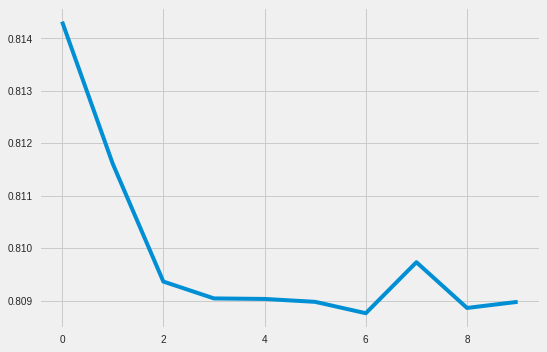

In [18]:
plt.plot(history.history['loss'])

In [19]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-5:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(5,len(test_data)):
  x_test.append(test_data[i-5:i, 0])

In [20]:
#convert the data to numpy 
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

71/71 [==============================] - 2s 7ms/step
[[0.00027747]
 [0.00027806]
 [0.00027754]
 ...
 [0.00028079]
 [0.00028238]
 [0.00028156]]


In [21]:
from sklearn.metrics import r2_score
r2_score(predictions,y_test)

-76702685.12430905

In [22]:
import datetime
# Get the number of predicted samples
num_predictions = predictions.shape[0]

# Get the current time
now = datetime.datetime.now()

time = [] 

# Iterate over the predictions and timestamps, and print the prediction and timestamp
for i in range(num_predictions):
  # Calculate the prediction timestamp by adding the number of days to the current time
  prediction_timestamp = now + datetime.timedelta(days=i)
  print("Prediction:", predictions[i], "Timestamp:", prediction_timestamp)
  time. append (str(prediction_timestamp))

Prediction: [0.00027747] Timestamp: 2023-02-15 17:19:08.763457
Prediction: [0.00027806] Timestamp: 2023-02-16 17:19:08.763457
Prediction: [0.00027754] Timestamp: 2023-02-17 17:19:08.763457
Prediction: [0.00027863] Timestamp: 2023-02-18 17:19:08.763457
Prediction: [0.00027921] Timestamp: 2023-02-19 17:19:08.763457
Prediction: [0.00027844] Timestamp: 2023-02-20 17:19:08.763457
Prediction: [0.0002793] Timestamp: 2023-02-21 17:19:08.763457
Prediction: [0.00028043] Timestamp: 2023-02-22 17:19:08.763457
Prediction: [0.00027917] Timestamp: 2023-02-23 17:19:08.763457
Prediction: [0.0002793] Timestamp: 2023-02-24 17:19:08.763457
Prediction: [0.00027937] Timestamp: 2023-02-25 17:19:08.763457
Prediction: [0.00027929] Timestamp: 2023-02-26 17:19:08.763457
Prediction: [0.0002782] Timestamp: 2023-02-27 17:19:08.763457
Prediction: [0.00027789] Timestamp: 2023-02-28 17:19:08.763457
Prediction: [0.00027749] Timestamp: 2023-03-01 17:19:08.763457
Prediction: [0.00027689] Timestamp: 2023-03-02 17:19:08.76

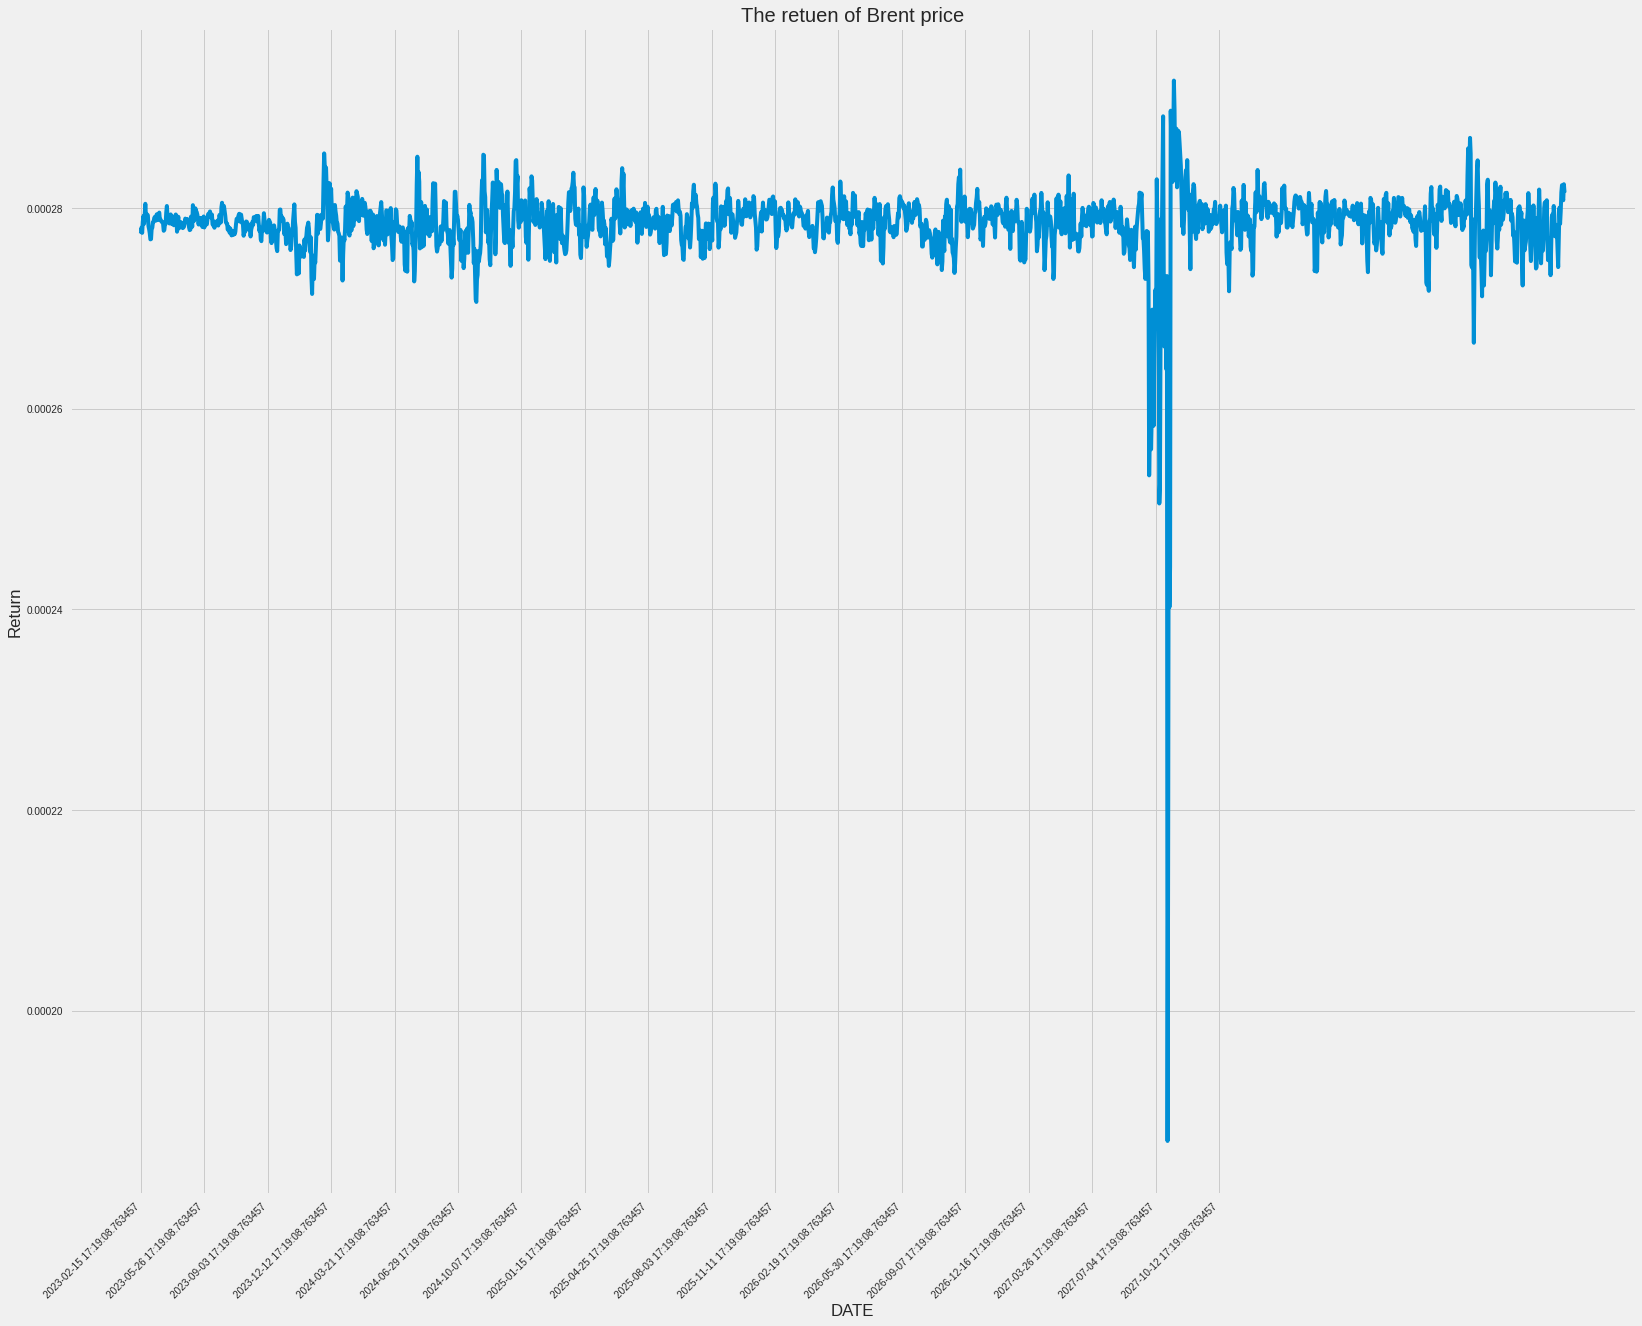

In [23]:
#visualize the Brent prices
plt.figure(figsize=(25,20))
plt.title('The retuen of Brent price')
plt.plot(predictions)
plt.xticks(pd.RangeIndex(0,1797,100), time[::100], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Return')
plt.show()